In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [3]:
df.shape

(891, 12)

In [4]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see there is lots of rows in missing in Cabin column So it's better to drop it. For the Age column we are goanna fill these with Mean. For the Embarked we are gonna drop tehese rows becaues there only 2 null

In [8]:
df.drop('Cabin',axis=1,inplace=True)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
df.drop(df[df['Embarked'].isna()].index,axis=0,inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###### For the servical we can understand that PassengerId, Name and Ticket is nothing to do with the servial so droping it

In [15]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [16]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


<AxesSubplot:>

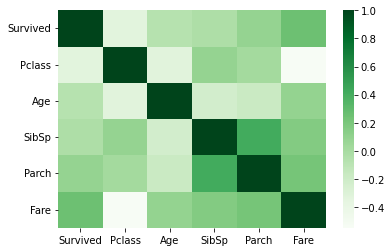

In [18]:
sns.heatmap(df.corr(), cmap = 'Greens')

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

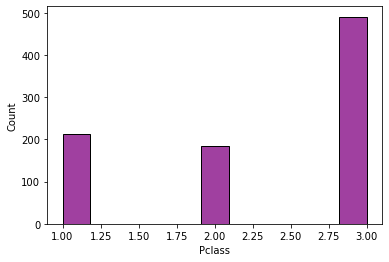

In [19]:
sns.histplot(df['Pclass'] , color="purple")

<AxesSubplot:xlabel='Sex', ylabel='Count'>

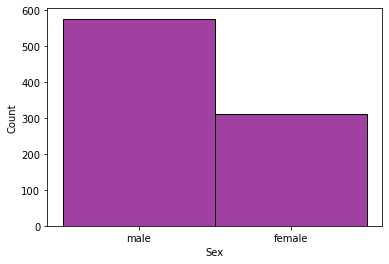

In [20]:
sns.histplot(df['Sex'], color="purple")

<AxesSubplot:xlabel='Age', ylabel='Count'>

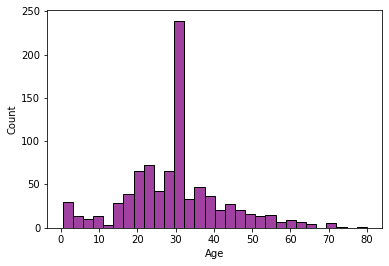

In [21]:
sns.histplot(df['Age'], color="purple")

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

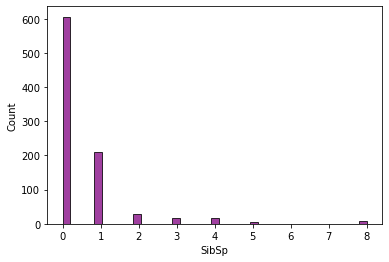

In [22]:
sns.histplot(df['SibSp'], color="purple")

<AxesSubplot:xlabel='Parch', ylabel='Count'>

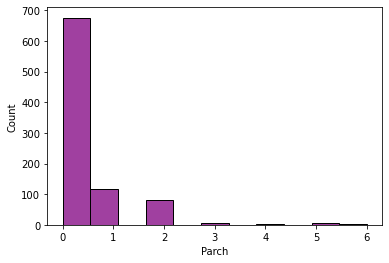

In [23]:
sns.histplot(df['Parch'], color="purple")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

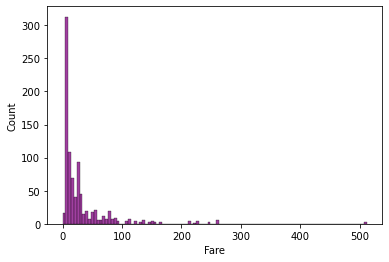

In [24]:
sns.histplot(df['Fare'], color="purple")

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

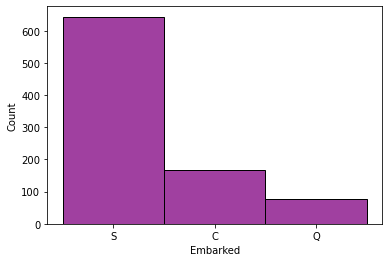

In [25]:
sns.histplot(df['Embarked'], color="purple")

<AxesSubplot:xlabel='Survived', ylabel='Count'>

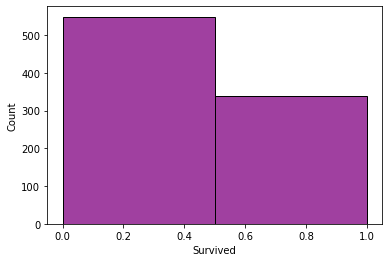

In [26]:
sns.histplot(df['Survived'],bins=2, color="purple")

###### We can see from insignt that Less people servirced then died and there are larage no of Males was there than male

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

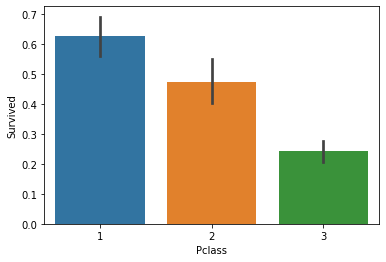

In [27]:
sns.barplot(df['Pclass'],df['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

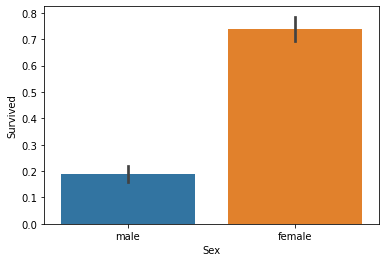

In [28]:
sns.barplot(df['Sex'],df['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

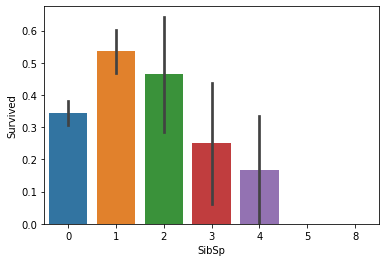

In [29]:
sns.barplot(df['SibSp'],df['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

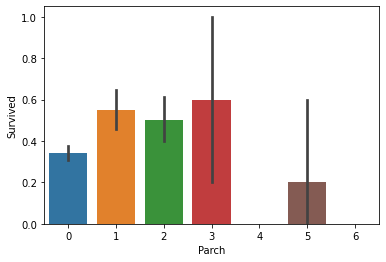

In [30]:
sns.barplot(df['Parch'],df['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

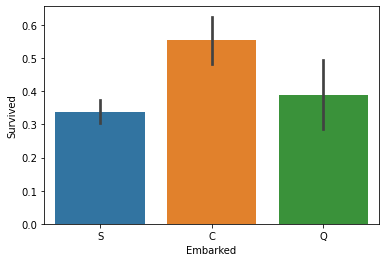

In [31]:
sns.barplot(df['Embarked'],df['Survived'])

###### From the insight we can understand that 
* More pepole survived with higher class Like 1st has hightest servival 
* Female were survived more than the male

In [32]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [33]:
# Performing lable encoder
df = df.apply(LabelEncoder().fit_transform)

In [34]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,52,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,48,1,0,189,2
4,0,2,1,48,0,0,43,2
...,...,...,...,...,...,...,...,...
886,0,1,1,35,0,0,85,2
887,1,0,0,24,0,0,153,2
888,0,2,0,39,1,2,131,2
889,1,0,1,34,0,0,153,0


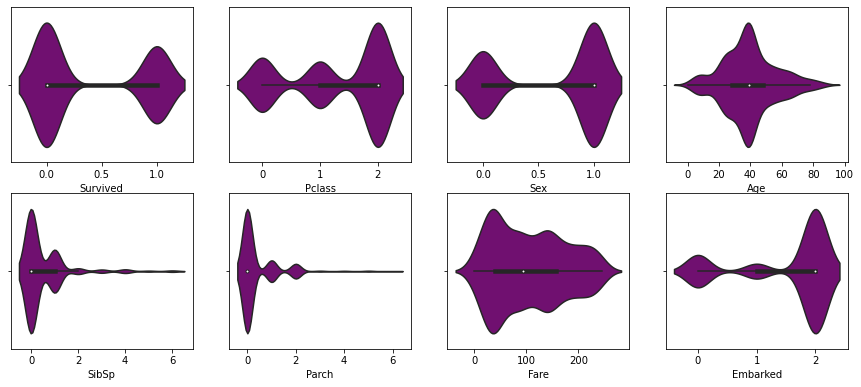

In [35]:
plt.figure(figsize=[15,20])
for i , column in enumerate(df.columns):
    plt.subplot(6,4,i+1)
    sns.violinplot(df[column], color="purple")

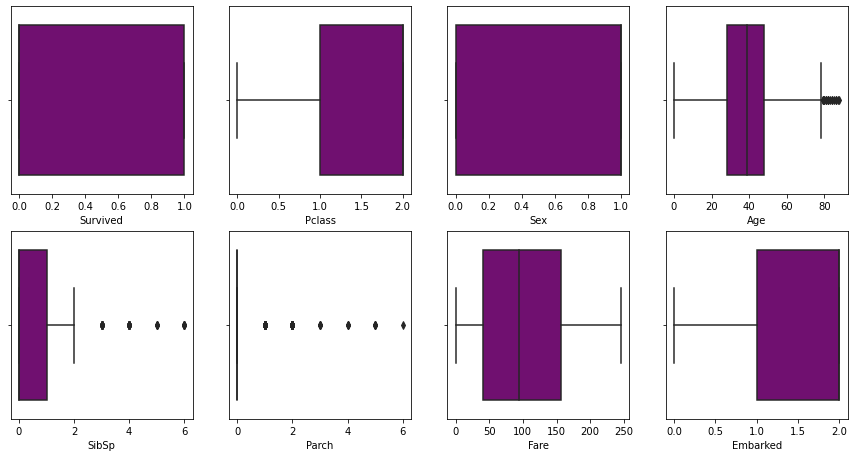

In [36]:
plt.figure(figsize=[15,20])
for i , column in enumerate(df.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[column], color="purple")

###### We can see Age, SibSp and Parch column have the outliers so removing it

In [37]:
abs_zscore = np.abs(stats.zscore(df))

In [38]:
threshold = 3
print(np.where(abs_zscore> threshold)[0])

[ 13  16  25  50  59  67  70  85 118 158 163 166 170 179 181 200 232 260
 265 277 323 359 385 436 437 479 540 541 566 609 637 677 682 685 735 773
 786 791 812 823 844 848 856 861 883]


In [39]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,52,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,48,1,0,189,2
4,0,2,1,48,0,0,43,2
...,...,...,...,...,...,...,...,...
886,0,1,1,35,0,0,85,2
887,1,0,0,24,0,0,153,2
888,0,2,0,39,1,2,131,2
889,1,0,1,34,0,0,153,0


In [40]:
df = df.drop(np.where(abs_zscore > threshold)[0],axis=0)

In [41]:
df['Survived'].value_counts()

0    517
1    327
Name: Survived, dtype: int64

# Spliting Variable

In [42]:
X = df.drop('Survived',axis=1)

In [43]:
y = df['Survived']

# Checking VIF

In [44]:
df_info = pd.DataFrame()
df_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
df_info['Columns'] = X.columns
df_info.sort_values('VIF',ascending=False)

,VIF,Columns
2,6.239513,Age
5,5.195383,Fare
6,4.477655,Embarked
0,3.906004,Pclass
1,3.043248,Sex
3,1.940377,SibSp
4,1.753625,Parch


###### all value are less than 10 so we can leave becaue there is very low Co-linerity found

# Checking for skewness

In [45]:
df.skew()

Survived    0.462922
Pclass     -0.628094
Sex        -0.621357
Age         0.345606
SibSp       3.020864
Parch       2.722012
Fare        0.371024
Embarked   -1.223312
dtype: float64

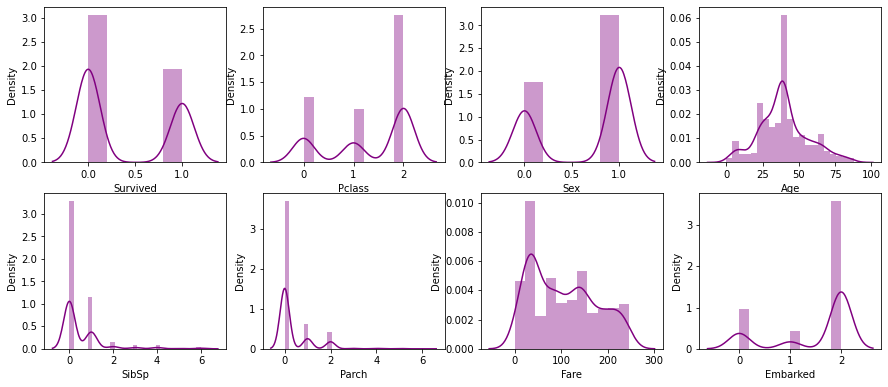

In [46]:
plt.figure(figsize=[15,20])
for i , column in enumerate(df.columns):
    plt.subplot(6,4,i+1)
    sns.distplot(df[column], color="purple")

###### We can there is a skeness in the Data So doign Power Transformation

In [47]:
X_transformted = PowerTransformer().fit_transform(X)

In [48]:
X = pd.DataFrame(X_transformted,columns=X.columns)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.853366,0.736859,-0.647682,1.377150,-0.547968,-1.422434,0.620601
1,-1.479116,-1.357111,0.769364,1.377150,-0.547968,1.307506,-1.756080
2,0.853366,-1.357111,-0.275265,-0.681793,-0.547968,-0.845127,0.620601
3,-1.479116,-1.357111,0.544900,1.377150,-0.547968,1.134855,0.620601
4,0.853366,0.736859,0.544900,-0.681793,-0.547968,-0.803680,0.620601
...,...,...,...,...,...,...,...
839,-0.537668,0.736859,-0.214593,-0.681793,-0.547968,-0.086915,0.620601
840,-1.479116,-1.357111,-0.905189,-0.681793,-0.547968,0.762861,0.620601
841,0.853366,-1.357111,0.024589,1.377150,1.879769,0.513567,0.620601
842,-1.479116,0.736859,-0.275265,-0.681793,-0.547968,0.762861,-1.756080


In [49]:
X.skew()

Pclass     -0.485622
Sex        -0.621357
Age         0.011931
SibSp       0.801076
Parch       1.280767
Fare       -0.162034
Embarked   -1.030387
dtype: float64

# Train Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=41,shuffle=True)

# Creating Model

## Logistic Regression 

In [51]:
logisticRegression = LogisticRegression()

In [52]:
logisticRegression.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred = logisticRegression.predict(X_test)
y_pred_proba = logisticRegression.predict_proba(X_test)[::,1]

In [54]:
metrics.accuracy_score(y_test,y_pred)

0.7535545023696683

In [55]:
metrics.confusion_matrix(y_test,y_pred)

array([[98, 29],
       [23, 61]], dtype=int64)

In [56]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

In [57]:
auc = metrics.roc_auc_score(y_test,y_pred_proba)
print('auc:',auc)

auc: 0.8316929133858267


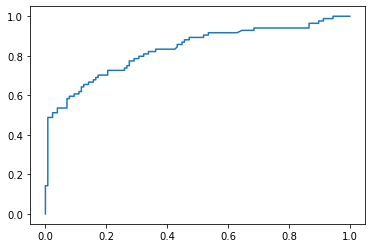

In [58]:
plt.plot(fpr,tpr)

# DecisionTreeClassifier

In [59]:
decisionTreeClassifier = DecisionTreeClassifier()

In [60]:
decisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred = decisionTreeClassifier.predict(X_test)
y_pred_proba = decisionTreeClassifier.predict_proba(X_test)[::,1]

In [62]:
metrics.accuracy_score(y_test,y_pred)

0.7819905213270142

In [63]:
metrics.confusion_matrix(y_test,y_pred)

array([[104,  23],
       [ 23,  61]], dtype=int64)

In [64]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

In [65]:
metrics.roc_auc_score(y_test,y_pred_proba)

0.7699662542182226

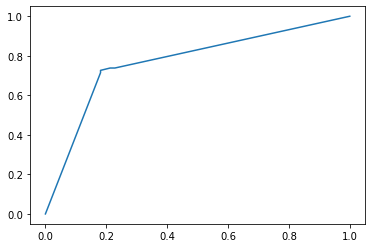

In [66]:
plt.plot(fpr,tpr)

# SVN

In [67]:
svc = SVC(probability=True)

In [68]:
svc.fit(X_train,y_train)

SVC(probability=True)

In [69]:
y_pred = svc.predict(X_test)
y_pred_proba = svc.predict_proba(X_test)[::,1]

In [70]:
metrics.accuracy_score(y_test,y_pred)

0.8056872037914692

In [71]:
metrics.confusion_matrix(y_test,y_pred)

array([[116,  11],
       [ 30,  54]], dtype=int64)

In [72]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

In [73]:
metrics.roc_auc_score(y_test,y_pred_proba)

0.8176321709786276

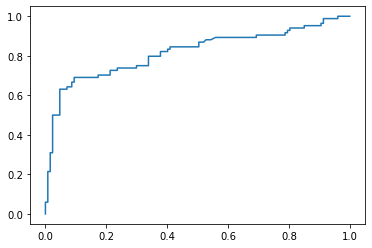

In [74]:
plt.plot(fpr,tpr)

# KNeighborsClassifier

In [75]:
kNeighborsClassifier = KNeighborsClassifier()

In [76]:
kNeighborsClassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
y_pred = kNeighborsClassifier.predict(X_test)
y_pred_proba = kNeighborsClassifier.predict_proba(X_test)[::,1]

In [78]:
metrics.accuracy_score(y_test,y_pred)

0.7677725118483413

In [79]:
metrics.roc_auc_score(y_test,y_pred_proba)

0.8351612298462692

In [80]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

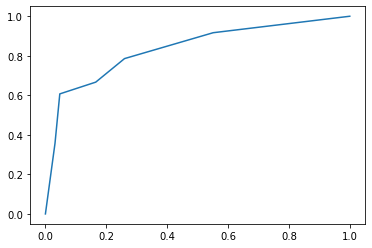

In [81]:
plt.plot(fpr,tpr)

###### We can see that we are geting 80% accuracy from SVC So selecting SVC

### Grid Search CV

In [82]:
param_grid = {
    'C': [1, 10, 101], 
    'kernel': ('linear', 'rbf'),
    'shrinking':[True,False],
    'probability': [True,False],
    
}
gridSearchCV = GridSearchCV(SVC(probability=True),param_grid=param_grid,n_jobs=10,cv=3)

In [83]:
gridSearchCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=10,
             param_grid={'C': [1, 10, 101], 'kernel': ('linear', 'rbf'),
                         'probability': [True, False],
                         'shrinking': [True, False]})

In [84]:
gridSearchCV.best_score_

0.7914691943127963

In [85]:
gridSearchCV.best_params_

{'C': 1, 'kernel': 'rbf', 'probability': True, 'shrinking': True}

### Cross Validation 

In [1]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    SVC(probability=True,C=1,shrinking=True,kernel='rbf'),
    X,
    y,
    cv=kFold,
    scoring='accuracy',
    n_jobs=10
)

NameError: name 'KFold' is not defined

In [2]:
print('scores:',np.mean(scores))
print('scores:',np.std(scores))

NameError: name 'np' is not defined